# tj_articles

author: Tatiana Rijoff
date: 11/01/2022
tj_articles allows a basic search of articles in pubmed using a combination of keywords '''

In [1]:
import pandas as pd
import os
import shutil
import glob

from tj_articles_analysis import Keywords
from tj_articles_analysis import PubMedExtraction
from tj_articles_analysis import TjArticlesAnalysis

## Prepare the environment

In [2]:
base_dir = 'project001/'

#
# directory separator 
#
# use '/' in linux and mac os
# use '\' in windows
dir_sep = '/'
# dir_sep = '\'


input_dir = base_dir  + 'input' + dir_sep
output_dir = base_dir  + 'output' + dir_sep
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)
working_dir = base_dir + 'tmp' + dir_sep
if not os.path.isdir(working_dir):
    os.mkdir(working_dir)
keys_dir = output_dir + 'keys' + dir_sep
if not os.path.isdir(keys_dir):
    os.mkdir(keys_dir)
pubmed_dir = working_dir + 'pubmed' + dir_sep
if not os.path.isdir(pubmed_dir):
    os.mkdir(pubmed_dir)
xml_dir = working_dir + 'xml' + dir_sep
if not os.path.isdir(xml_dir):
    os.mkdir(xml_dir)
abstract_dir = working_dir + 'abstracts' + dir_sep
if not os.path.isdir(abstract_dir):
    os.mkdir(abstract_dir)
latex_dir = working_dir + 'latex' + dir_sep
if not os.path.isdir(latex_dir):
    os.mkdir(latex_dir)
pdf_dir = output_dir + 'pdf' + dir_sep
if not os.path.isdir(pdf_dir):
    os.mkdir(pdf_dir)
img_dir = output_dir + 'img' + dir_sep
if not os.path.isdir(img_dir):
    os.mkdir(img_dir)

In [3]:
country_df = pd.read_excel(input_dir + 'country_dict.xlsx')

## Keywords

In [4]:
key_list = Keywords()

### Load an already created list of keywords

In [5]:
key_list.load_keywords_list(keys_dir + 'keywords_list.xlsx')

### add data from other keys and save all the results in the excel

In [6]:
# default when the keywords is more than one word the sentence is between quote ' '
# key_list.find_keys_from_excel(input_dir + 'keywords.xlsx', 'TwoColumns')

# mod2 from the second column the keywords are not in quotes (this means 
# that publmed will consider an AND between the words )
key_list.find_keys_from_excel_mod2(input_dir + 'keywords.xlsx', 'TwoColumns')

# mod3 for all the columns the keywords are not in quotes (this means 
# that publmed will consider an AND between the words )
# key_list.find_keys_from_excel(input_dir + 'keywords.xlsx', 'TwoColumns')

key_list.save_keywords_list(keys_dir + 'keywords_list.xlsx')

## Pubmed

In [7]:
pub_engine = PubMedExtraction()

### Load the information from a pre-saved file

In [8]:
pub_engine.load_pubmed_idlist(pubmed_dir + 'id_list.txt')
key_list.load_articles(keys_dir + 'articles_found.xlsx')

### Add data from the other key and save all the results in the excel

In [9]:
pub_engine.load_pubmed_from_key(key_list)
pub_engine.save_pubmed_idlist(pubmed_dir + 'id_list.txt')
key_list.save_keywords(keys_dir + 'keywords_list.xlsx')
key_list.save_articles(keys_dir + 'articles_found.xlsx')

Articles found with "Chronic disease" AND Patient Journey: 142
Articles found with "Metabolic disease" AND Patient Journey: 2
Articles found with "Congenital disease" AND Patient Journey: 0
Articles found with "Rare disease" AND Patient Journey: 38
project001/tmp/pubmed/id_list.txt


### Load xml for each article

In [10]:
pub_engine.find_info_xml(xml_dir)

Data for 23204003 already collected
Data for 16721004 already collected
Data for 33926503 already collected
Data for 26980115 already collected
Data for 22458665 already collected
Data for 18773795 already collected
Data for 15154988 already collected
Data for 17679571 already collected
Data for 26786554 already collected
Data for 26495551 already collected
Data for 25889390 already collected
Data for 31362945 already collected
Data for 31934321 already collected
Data for 19708307 already collected
Data for 28827275 already collected
Data for 24828245 already collected
Data for 24837004 already collected
Data for 32605553 already collected
Data for 31285719 already collected
Data for 32370150 already collected
Data for 32128950 already collected
Data for 32039777 already collected
Data for 28235984 already collected
Data for 21969269 already collected
Data for 34299688 already collected
Data for 30897535 already collected
Data for 26097632 already collected
Data for 28034320 already co

## Article analysis

In [11]:
my_analysis = TjArticlesAnalysis(country_df, abstract_dir)

### Load the information a presaved file

In [12]:
my_analysis.load_data_analysis(output_dir + 'info_extraction.xlsx')

### find information for the articles

In [13]:
for article_id in pub_engine.idlist:
    my_analysis.collect_pubmed_data(xml_dir, article_id, key_list)
print("save information in ", (output_dir + 'info_extraction.xlsx'))
my_analysis.save_data_analysis(output_dir + 'info_extraction.xlsx')
print("save information in ", (output_dir + 'revision_articles.xlsx'))
# ~ the revision excel is specific for the project and the code must be customized by user
my_analysis.save_for_review(output_dir + 'revision_articles.xlsx')

"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" 

"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Rare disease" AND Patien

"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Rare disease" AND Patient Journey
"Rare disease" AND Patient Journey
"Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Metabolic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey
"Chronic disease" AND Pa

### Create pdf

In [14]:
for article_id in pub_engine.idlist:
    my_analysis.create_pdf(article_id, latex_dir)

Pdf 0_Rostami_2012 already exists
Pdf 1_Carrero_2006 already exists
Pdf 2_Bernthal_2021 already exists
Pdf 3_Amalberti_2016 already exists
Pdf 4_Husain_2012 already exists
Pdf 5_Bellin_2008 already exists
Pdf 6_Gunnarsdottir_2004 already exists
Pdf 7_Kelly_2007 already exists
Pdf 8_Grant_2017 already exists
Pdf 9_Prince_2015 already exists
Pdf 10_Liu_2015 already exists
Pdf 11_Gough_2020 already exists
Pdf 12_Kontoghiorghes_2020 already exists
Pdf 13_Lowen_2009 already exists
Pdf 14_Palacios-Ceña_2017 already exists
Pdf 15_Martin_2014 already exists
Pdf 16_Moss_2015 already exists
Pdf 17_Svensson_2020 already exists
Pdf 18_Serna_2019 already exists
Pdf 19_Vanfleteren_2020 already exists
Pdf 20_Quinn_2020 already exists
Pdf 21_Tsai_2020 already exists
Pdf 22_Rueda Guzmán_2017 already exists
Pdf 23_Sterling_2011 already exists
Pdf 24_Blignault_2021 already exists
Pdf 25_Byrne_2019 already exists
Pdf 26_Hien_2015 already exists
Pdf 27_Clark_2018 already exists
Pdf 28_Cooper-Stanton_2020 a

In [15]:
for file in glob.glob(latex_dir+'*.pdf'):
    print(file)
    shutil.copy(file, pdf_dir)


project001/tmp/latex/24_Blignault_2021.pdf
project001/tmp/latex/143_Wicks_2014.pdf
project001/tmp/latex/42_Cook_2017.pdf
project001/tmp/latex/169_Wolever_2017.pdf
project001/tmp/latex/47_Hamdy_2021.pdf
project001/tmp/latex/117_Mayor_2006.pdf
project001/tmp/latex/95_Tan_2021.pdf
project001/tmp/latex/90_White_2008.pdf
project001/tmp/latex/139_Lage_2001.pdf
project001/tmp/latex/97_Baumbusch_2018.pdf
project001/tmp/latex/64_Kinoshita_2021.pdf
project001/tmp/latex/94_Choi_2021.pdf
project001/tmp/latex/175_Atkins_2012.pdf
project001/tmp/latex/36_Wagholikar_2012.pdf
project001/tmp/latex/164_Wagholikar_2011.pdf
project001/tmp/latex/27_Clark_2018.pdf
project001/tmp/latex/88_Donald_2019.pdf
project001/tmp/latex/53_Stopper_2011.pdf
project001/tmp/latex/23_Sterling_2011.pdf
project001/tmp/latex/43_Macnamara_2019.pdf
project001/tmp/latex/58_Zhang_2017.pdf
project001/tmp/latex/113_Keskin_2020.pdf
project001/tmp/latex/133_Hegge_2012.pdf
project001/tmp/latex/173_Saunders_2018.pdf
project001/tmp/latex/

## Plot results

<Figure size 864x360 with 0 Axes>

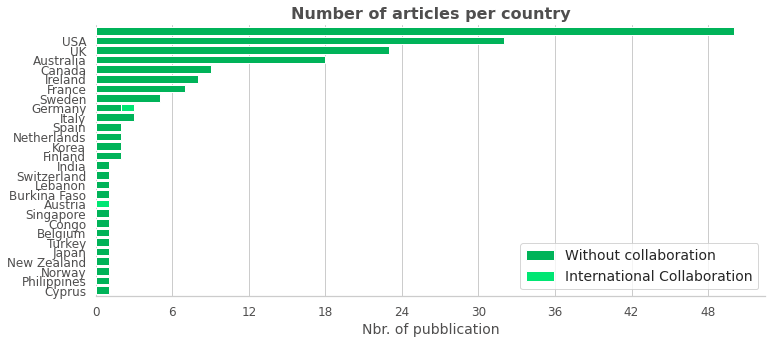

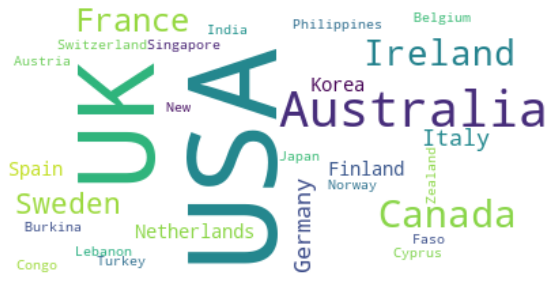

In [16]:
my_analysis.plot_countries(img_dir + 'countries.png', img_dir + 'countries_collab.png')
my_analysis.plot_wordclouds_countries(img_dir + 'wordclouds_countries.png')

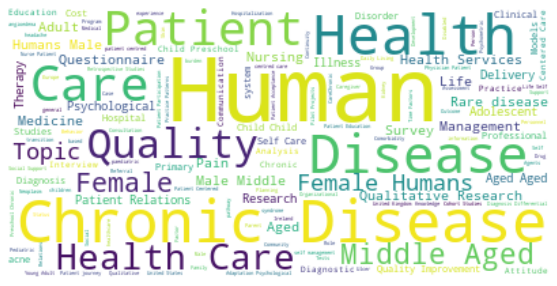

In [17]:
my_analysis.plot_pubkeys(img_dir + 'pubkeys.png')

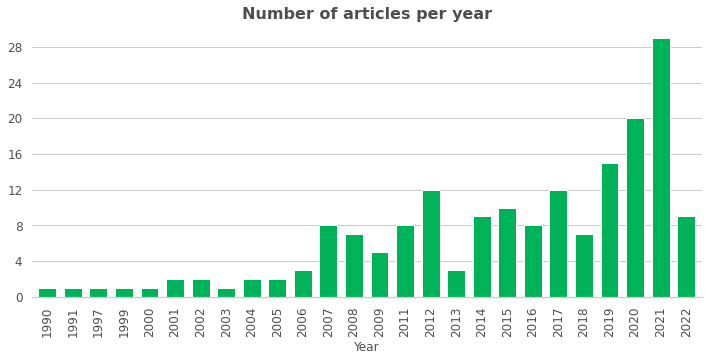

In [18]:
my_analysis.plot_years(img_dir + 'years.png')